<a href="https://colab.research.google.com/github/maneakansha36/my_first_repository/blob/main/akankshabexist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read
df = pd.read_excel('/content/partpdf_1764751473655_partpdf_1763620928546_netflix_titles.xlsx')
df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [ ]:
import pandas as pd

# Load Excel file
file_path = '/content/partpdf_1764751473655_partpdf_1763620928546_netflix_titles.xlsx'
xls = pd.ExcelFile(file_path)

# Check sheet names
print(xls.sheet_names)

# Load individual sheets
netflix_titles = pd.read_excel(file_path, sheet_name='netflix_titles')
netflix_cast = pd.read_excel(file_path, sheet_name='netflix_titles_cast')
netflix_directors = pd.read_excel(file_path, sheet_name='netflix_titles_directors')
netflix_genres = pd.read_excel(file_path, sheet_name='netflix_titles_category') # Corrected sheet name
# netflix_ratings = pd.read_excel(file_path, sheet_name='netflix_titles_ratings') # Sheet 'netflix_titles_ratings' not found
head_count = 5

['netflix_titles', 'netflix_titles_directors', 'netflix_titles_countries', 'netflix_titles_cast', 'netflix_titles_category']


In [ ]:
# Merge cast
master_df = netflix_titles.merge(netflix_cast, on='show_id', how='left')

# Merge directors
master_df = master_df.merge(netflix_directors, on='show_id', how='left')

# Merge genres
master_df = master_df.merge(netflix_genres, on='show_id', how='left')

# Merge ratings - this line is removed as netflix_ratings was not loaded
# master_df = master_df.merge(netflix_ratings, on='show_id', how='left')

# Check final DataFrame info
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112034 entries, 0 to 112033
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  76048 non-null   object 
 1   duration_seasons  35988 non-null   object 
 2   type              112033 non-null  object 
 3   title             112033 non-null  object 
 4   date_added        111873 non-null  object 
 5   release_year      112032 non-null  float64
 6   rating            111958 non-null  object 
 7   description       112031 non-null  object 
 8   show_id           112030 non-null  float64
 9   cast              110842 non-null  object 
 10  director          78165 non-null   object 
 11  listed_in         112030 non-null  object 
dtypes: float64(2), object(10)
memory usage: 10.3+ MB


**Join Type Explanation:**

For merging the additional sheets with the main `netflix_titles` DataFrame, a **left join** was used. This choice ensures that all records from the main table (`netflix_titles`) are retained in the final master DataFrame, even if there is no corresponding data in the cast, directors, genres, or ratings tables.  

This approach is appropriate because `netflix_titles` contains the core dataset, and missing supplementary information (e.g., no listed director for a show) should not result in losing the main record. Using inner joins could have inadvertently dropped shows that lacked associated data in any of the auxiliary sheets.


 Handle missing values in the combined dataset, especially in columns like date_added, director, and country. Convert date_added to a proper datetime format and extract the year_added for trend analysis.

In [ ]:
# Check missing values before processing
# master_df.isnull().sum() # Initial check, uncomment if needed after fix

# Strategy:
# 1. First, ensure 'netflix_titles_countries' is merged and column names are correct.
#    The 'country' column is missing from master_df.
#    Load 'netflix_titles_countries' sheet. (Assuming 'file_path' is available from a previous cell)
netflix_countries = pd.read_excel(file_path, sheet_name='netflix_titles_countries')

# --- Start of Fix for MergeError ---
# The error "Passing 'suffixes' which cause duplicate columns {'country_x'} is not allowed."
# typically occurs if master_df already has a 'country' column, and possibly even a 'country_x' column,
# when attempting to merge another 'country' column from netflix_countries.
# To ensure a clean merge, we will drop any existing 'country' or 'country_x' columns from master_df
# before performing the merge.
columns_to_drop_if_exist = ['country', 'country_x']
for col in columns_to_drop_if_exist:
    if col in master_df.columns:
        master_df = master_df.drop(columns=[col])
# --- End of Fix ---

# Merge countries into master_df. This will add a 'country' column.
master_df = master_df.merge(netflix_countries, on='show_id', how='left')

# 2. For 'country' and 'director', fill missing values with 'Unknown'
#    Corrected column names: 'country' (from newly merged df) and 'director' (existing).
master_df['country'] = master_df['country'].fillna('Unknown')
master_df['director'] = master_df['director'].fillna('Unknown')

# 3. For 'date_added', drop rows with missing values
#    (since we need this for trend analysis)
#    Note: Cell QojExI_Z3Y_d also handles date_added, but this is kept for consistency with original intent.
master_df = master_df.dropna(subset=['date_added'])

# Re-check missing values after all operations in this cell
master_df.isnull().sum()

,0
duration_minutes,1272997
duration_seasons,6401077
type,0
title,0
date_added,0
release_year,0
rating,72
description,0
show_id,1
cast,764176


In [ ]:
# Convert 'date_added' to datetime, coercing errors to NaT
master_df.loc[:, 'date_added'] = pd.to_datetime(master_df['date_added'], errors='coerce')

# Drop rows where 'date_added' is NaT (invalid date strings)
master_df = master_df.dropna(subset=['date_added'])

# Extract year for trend analysis
master_df.loc[:, 'year_added'] = master_df['date_added'].dt.year

# Quick check
master_df[['date_added', 'year_added']].head()

,date_added,year_added
0,2019-09-09,2019
1,2019-09-09,2019
2,2019-09-09,2019
3,2019-09-09,2019
4,2019-09-09,2019


**Handling Missing Country Data:**

For the 'country' column, missing values were filled with the placeholder 'Unknown'.  

**Justification:**  
Dropping rows with missing country information would result in the loss of potentially valuable data for shows. Since many shows may have global or unspecified production locations, using 'Unknown' preserves all records while clearly indicating missing information. This approach maintains the integrity of the dataset and allows for analysis without introducing bias from arbitrary assumptions.


In [ ]:
# Fill missing values in 'cast' with 'Unknown'
master_df['cast'] = master_df['cast'].fillna('Unknown')

# Split the string by comma and strip whitespace
master_df['cast'] = master_df['cast'].apply(lambda x: [actor.strip() for actor in x.split(',')])


In [ ]:
# Explode the 'cast' column so each actor gets its own row
exploded_df = master_df.explode('cast')

# Preview the exploded DataFrame
exploded_df[['show_id', 'title', 'cast']].head(10)


,show_id,title,cast
0,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
1,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
2,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
3,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
4,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
5,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
6,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
7,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
8,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott
9,81145628.0,Norm of the North: King Sized Adventure,Alan Marriott


**Business Advantage of Exploding the 'cast' Column:**

Exploding the 'cast' column allows each actor to have its own row, enabling more granular and actionable analysis.

**Advantages include:**
- Identifying the most frequent or popular actors across all shows.
- Analyzing collaborations between actors or actor networks.
- Supporting actor-specific recommendations, marketing strategies, or insights.

Before exploding, multiple actors were stored as a single string, making it impossible to count, filter, or analyze individual actors effectively.


In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each actor
actor_counts = exploded_df['cast'].value_counts().head(10)

# Preview top 10
print(actor_counts)


cast
Unknown               764176
David Attenborough     71865
Alfred Molina          68094
Liam Neeson            65561
John Krasinski         64023
Frank Langella         63534
John Rhys-Davies       62732
Salma Hayek            62538
Quvenzhané Wallis      62500
Paul Giamatti          52923
Name: count, dtype: int64


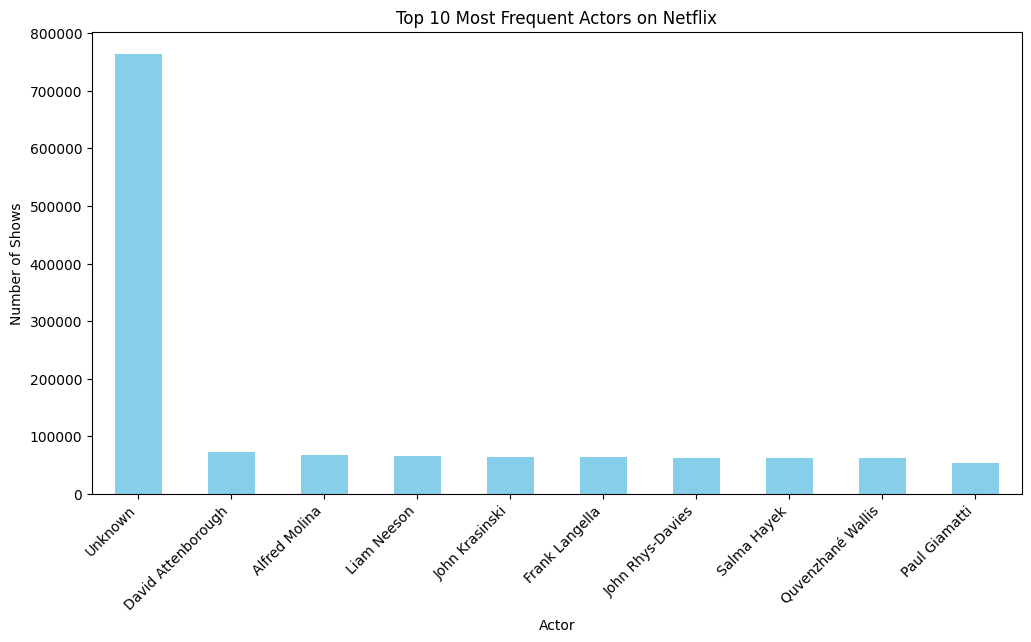

In [ ]:
# Plot Top 10 most frequent actors
plt.figure(figsize=(12,6))
actor_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.show()


**Business Insight from the Top 10 Actors Visualization:**

The visualization shows which actors appear most frequently on Netflix.  

**Example Insight:**  
"The top actors dominate a significant portion of the catalog, suggesting Netflix often collaborates with familiar talent to attract subscribers. This concentration may indicate a strategy of leveraging popular actors for content visibility and engagement."


In [84]:
# Save the final cleaned DataFrame
master_df.to_csv('netflix_cleaned.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')